In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [3]:
dv = pd.read_csv('khasu-006135579.csv')

In [4]:
dv.groupby('Winner').count()

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
Winner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Blue,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1

In [5]:
dv.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.20000

Getting the index of the womens columns and deleting those values

In [6]:
womens = ["weight_class_Women's Bantamweight", "weight_class_Women's Featherweight", "weight_class_Women's Flyweight",
         "weight_class_Women's Strawweight"]

for x in womens:
    dv.drop(dv.loc[dv[x]==1].index, inplace=True)

dv = dv[dv.columns.drop(list(dv.filter(regex='Women')))]

Changes the Winner Column to reflect if the blue fighter won

0 = loss 

1 = won

In [7]:
dv['Winner'] = dv['Winner'].replace({'Blue':1,'Red':0})

Drop the Columns containing 'Womens' as that only pertains to womens fights

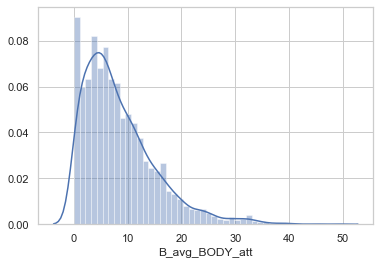

In [8]:
sns.distplot(dv['B_avg_BODY_att']);

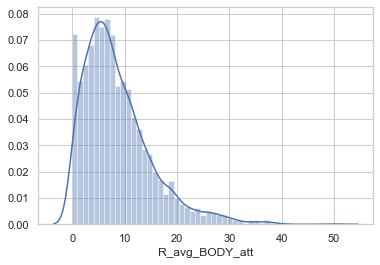

In [9]:
sns.distplot(dv['R_avg_BODY_att']);

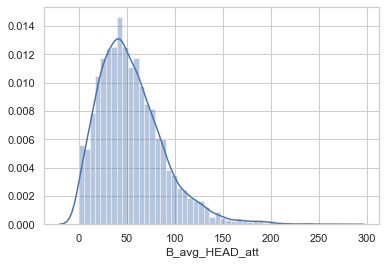

In [10]:
sns.distplot(dv['B_avg_HEAD_att']);

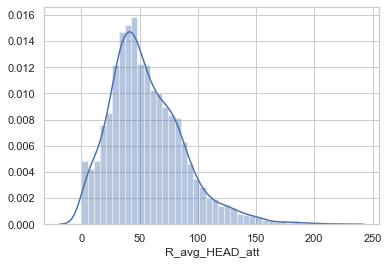

In [11]:
sns.distplot(dv['R_avg_HEAD_att']);

In [12]:
dv.groupby('Winner').mean()

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
Winner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.084364,3.187721,0.569788,1.091873,0.0,7.685510,5.451884,7.659308,5.144392,47.343966,17.126077,8.775572,5.729682,50.541747,18.149874,0.256426,5.551588,4.398393,1.287185,0.174872,63.778845,28.000151,0.458705,0.574034,2.700685,1.168060,0.321129,86.293063,48.183417,2.163869,1.992049,7.537326,5.222330,7.106787,4.673893,46.779375,16.411973,7.333652,4.726097,48.114611,16.201780,0.168364,5.567877,4.387853,1.093357,0.157768,61.219814,25.811963,0.427410,0.477810,2.790518,1.078143,0.281626,81.795397,44.362137,12.005742,571.712514,0.456714,0.027827,0.283569,0.989841,1.253092,0.782686,0.071555,3.416961,180.314196,184.31492,176.060512,0.574205,1.310071,0.0,8.180408,5.788521,7.870584,5.304198,49.585665,18.206430,10.294869,6.761345,53.544677,19.718659,0.279923,6.026033,4.764793,1.501917,0.147431,67.751118,30.271973,0.470611,0.577749,3.112483,1.386120,0.351047,90.159999,50.435160,2.825088,2.144435,7.439827,4.9848

In [13]:
# body percentage
dv['bbodypct'] = dv['B_avg_BODY_landed'] / dv['B_avg_BODY_att']
dv['rbodypct'] = dv['R_avg_BODY_landed'] / dv['R_avg_BODY_att']

# head percentage
dv['bheadpct'] = dv['B_avg_HEAD_landed'] / dv['B_avg_HEAD_att']
dv['rheadpct'] = dv['R_avg_HEAD_landed'] / dv['R_avg_HEAD_att']

# sig strikes percentage
dv['bsigpct'] = dv['B_avg_SIG_STR_landed'] / dv['B_avg_SIG_STR_att']
dv['rsigpct'] = dv['R_avg_SIG_STR_landed'] / dv['R_avg_SIG_STR_att']

# opponent body percentage
dv['bopbodypct'] = dv['B_avg_opp_BODY_landed'] / dv['B_avg_opp_BODY_att']
dv['ropbodypct'] = dv['R_avg_opp_BODY_landed'] / dv['R_avg_opp_BODY_att']

# opponent head percentage
dv['bopheadpct'] = dv['B_avg_opp_HEAD_landed'] / dv['B_avg_opp_HEAD_att']
dv['ropheadpct'] = dv['R_avg_opp_HEAD_landed'] / dv['R_avg_opp_HEAD_att']

# opponent sig strikes percentage
dv['bopsigpct'] = dv['B_avg_opp_SIG_STR_landed'] / dv['B_avg_opp_SIG_STR_att']
dv['ropsigpct'] = dv['R_avg_opp_SIG_STR_landed'] / dv['R_avg_opp_SIG_STR_att']

mine = ['bbodypct','rbodypct','bheadpct','rheadpct','bsigpct','rsigpct','bopbodypct','ropbodypct',
        'bopheadpct','ropheadpct','bopsigpct','ropsigpct','Winner','B_Stance_Orthodox','R_Stance_Orthodox',
       'B_Stance_Southpaw','R_Stance_Southpaw']


# renaming age
dv = dv.rename(columns={'no_of_rounds': 'numrounds','B_age':'bage','R_age':'rage',
                       'R_total_time_fought(seconds)':'rtimefought','B_total_time_fought(seconds)':'btimefought'})
dv = dv.dropna()
strikes = dv[mine].copy()

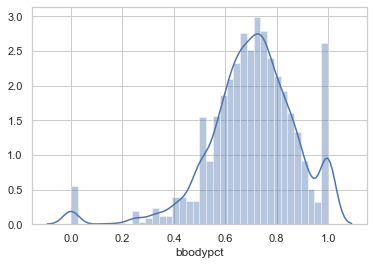

In [14]:
sns.distplot(strikes['bbodypct'])

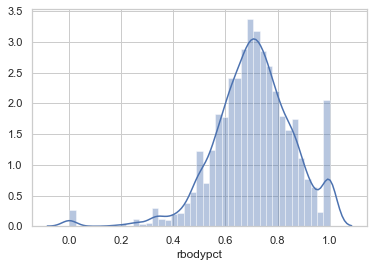

In [15]:
sns.distplot(strikes['rbodypct'])

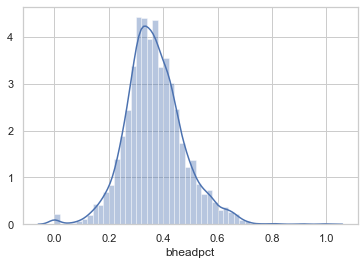

In [16]:
sns.distplot(strikes['bheadpct'])

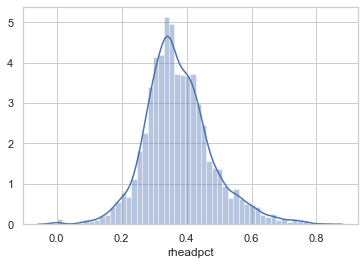

In [17]:
sns.distplot(strikes['rheadpct'])

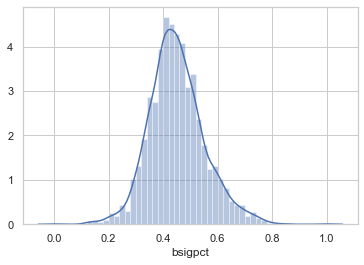

In [18]:
sns.distplot(strikes['bsigpct'])

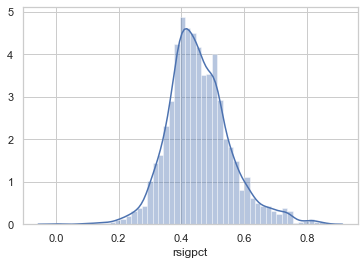

In [19]:
sns.distplot(strikes['rsigpct'])

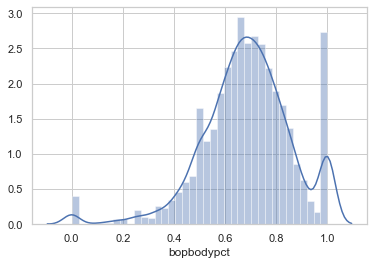

In [20]:
sns.distplot(strikes['bopbodypct'])

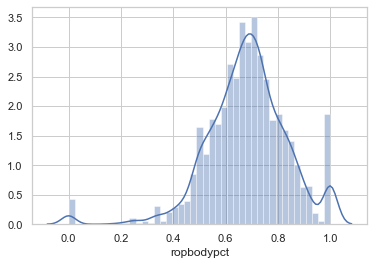

In [21]:
sns.distplot(strikes['ropbodypct'])

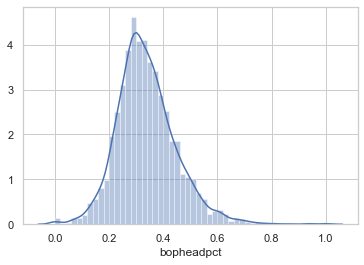

In [22]:
sns.distplot(strikes['bopheadpct'])

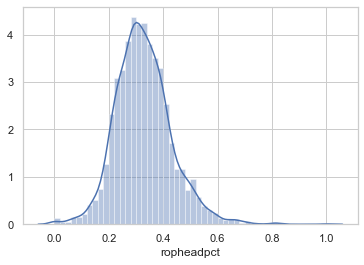

In [23]:
sns.distplot(strikes['ropheadpct'])

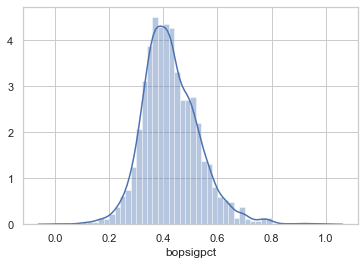

In [24]:
sns.distplot(strikes['bopsigpct'])

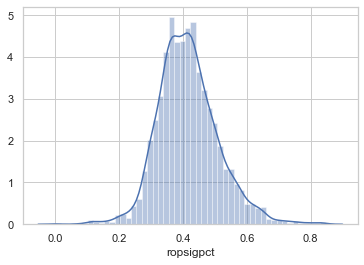

In [25]:
sns.distplot(strikes['ropsigpct'])

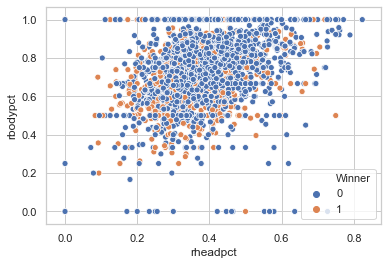

In [26]:
sns.scatterplot(strikes['rheadpct'],strikes['rbodypct'],hue=strikes['Winner'])

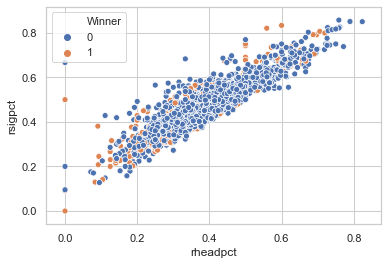

In [27]:
sns.scatterplot(strikes['rheadpct'],strikes['rsigpct'],hue=strikes['Winner'])

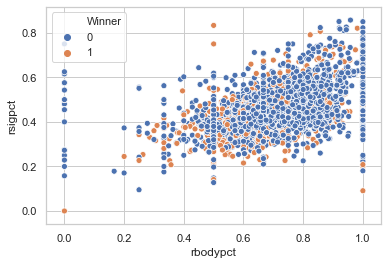

In [28]:
sns.scatterplot(strikes['rbodypct'],strikes['rsigpct'],hue=strikes['Winner'])

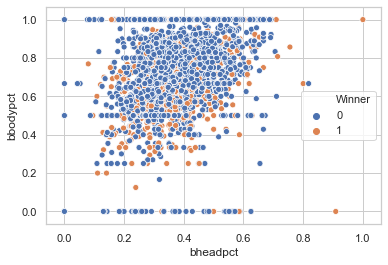

In [29]:
sns.scatterplot(strikes['bheadpct'],strikes['bbodypct'],hue=strikes['Winner'])

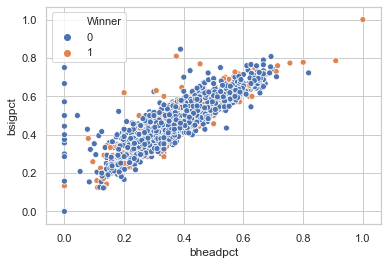

In [30]:
sns.scatterplot(strikes['bheadpct'],strikes['bsigpct'],hue=strikes['Winner'])

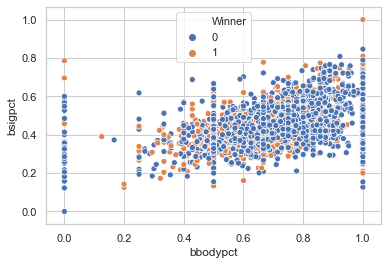

In [31]:
sns.scatterplot(strikes['bbodypct'],strikes['bsigpct'],hue=strikes['Winner'])

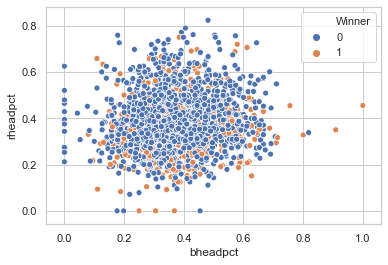

In [32]:
sns.scatterplot(strikes['bheadpct'],strikes['rheadpct'],hue=strikes['Winner'])

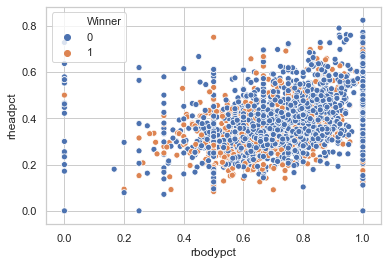

In [33]:
sns.scatterplot(strikes['rbodypct'],strikes['rheadpct'],hue=strikes['Winner']);

In [34]:
strikes.groupby('Winner').mean()

,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct,B_Stance_Orthodox,R_Stance_Orthodox,B_Stance_Southpaw,R_Stance_Southpaw
Winner,,,,,,,,,,,,,,,,
0,0.713031,0.717060,0.368327,0.382703,0.452345,0.462137,0.697717,0.681051,0.345266,0.322616,0.434408,0.412330,0.770761,0.740925,0.198409,0.228245
1,0.688925,0.687818,0.367289,0.361341,0.446520,0.442852,0.658192,0.680327,0.324636,0.338364,0.415114,0.423045,0.744318,0.765152,0.218750,0.206439


In [35]:
strikes.groupby('Winner').count()

,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct,B_Stance_Orthodox,R_Stance_Orthodox,B_Stance_Southpaw,R_Stance_Southpaw
Winner,,,,,,,,,,,,,,,,
0,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
1,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056


In [36]:
strikes.head()

,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct,Winner,B_Stance_Orthodox,R_Stance_Orthodox,B_Stance_Southpaw,R_Stance_Southpaw
0,0.652174,0.748858,0.230453,0.322102,0.345566,0.433925,0.625000,0.661654,0.237374,0.227332,0.344697,0.325911,0,1,1,0,0
2,0.737395,0.625000,0.343825,0.368022,0.482208,0.446113,0.663063,0.562212,0.376729,0.296422,0.473433,0.361918,0,1,1,0,0
3,0.823529,0.561644,0.462366,0.298137,0.515596,0.409396,0.489796,0.660494,0.260606,0.263328,0.311275,0.404735,1,0,1,0,0
4,0.852941,0.870968,0.243902,0.448276,0.302211,0.522088,0.552941,0.760000,0.370492,0.323699,0.437956,0.409091,1,0,0,1,1
6,0.494444,0.725166,0.360451,0.370370,0.431917,0.508929,0.550633,0.523364,0.363977,0.205374,0.410853,0.308677,0,1,1,0,0


In [37]:
dv.groupby('numrounds').mean()

,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,btimefought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,rtimefought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,bage,rage,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct
numrounds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.500000,1.250000,0.0,0.666667,0.533333,2.345833,1.533333,8.862500,3.750000,8.008333,5.050000,14.529167,6.862500,0.320833,4.020833,2.937500,0.833333,0.062500,19.216667,10.333333,0.611042,0.733333,0.600000,0.475000,0.360000,28.900000,18.429167,2.500000,1.000000,1.104167,0.737500,2.770833,1.487500,7.050000,2.604167,2.037500,1.308333,7.829167,2.829167,0.050000,2.925000,1.833333,0.245833,0.062500,11.858333,5.400000,0.339708,0.833333,0.683333,0.195833,0.195833,23.654167,15.829167,4.000000,304.775000,0.750000,0.000000,0.000000,0.000000,1.500000,1.500000,0.000000,3.000000,187.960000,187.960000,243.750000,0.250000,1.250000,0.0,0.269345,0.166667,0.784226,0.455357,5.400298,2.614583,2.858631,1.654762,5.413690,2.305060,0.083333,3.360119,2.252976,0.940476,0.154762,9.043155,4.724702,0.415015,1.068452,1.1011

In [38]:
dv.groupby('numrounds').count()

,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,btimefought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,rtimefought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,bage,rage,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct
numrounds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,

In [39]:
strikes.groupby('Winner').mean()

,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct,B_Stance_Orthodox,R_Stance_Orthodox,B_Stance_Southpaw,R_Stance_Southpaw
Winner,,,,,,,,,,,,,,,,
0,0.713031,0.717060,0.368327,0.382703,0.452345,0.462137,0.697717,0.681051,0.345266,0.322616,0.434408,0.412330,0.770761,0.740925,0.198409,0.228245
1,0.688925,0.687818,0.367289,0.361341,0.446520,0.442852,0.658192,0.680327,0.324636,0.338364,0.415114,0.423045,0.744318,0.765152,0.218750,0.206439


In [40]:
strikes.groupby('Winner').count()

,bbodypct,rbodypct,bheadpct,rheadpct,bsigpct,rsigpct,bopbodypct,ropbodypct,bopheadpct,ropheadpct,bopsigpct,ropsigpct,B_Stance_Orthodox,R_Stance_Orthodox,B_Stance_Southpaw,R_Stance_Southpaw
Winner,,,,,,,,,,,,,,,,
0,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
1,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056,1056


In [41]:
x = [x for x in strikes.columns if x not in 'Winner']
y = ['Winner']
x = strikes[x]
y = strikes[y]

In [42]:
# https://www.juanshishido.com/logisticcoefficients.html
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.625118
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.029     
Dependent Variable: Winner           AIC:              3866.4747 
Date:               2019-12-12 23:16 BIC:              3962.9300 
No. Observations:   3067             Log-Likelihood:   -1917.2   
Df Model:           15               LL-Null:          -1974.7   
Df Residuals:       3051             LLR p-value:      1.8201e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
bbodypct          -0.3976   0.2608 -1.5246 0.1273 -0.9088  0.1135
rbodypct          -0.7799   0.2946 -2.6471 0.0081 -1.3574 -0.2024


In [43]:
using_reduced = ['rbodypct','rheadpct','bopbodypct','bopheadpct','ropheadpct']
reduced = strikes[using_reduced]
x = reduced

In [44]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628421
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.024     
Dependent Variable: Winner           AIC:              3864.7358 
Date:               2019-12-12 23:16 BIC:              3894.8781 
No. Observations:   3067             Log-Likelihood:   -1927.4   
Df Model:           4                LL-Null:          -1974.7   
Df Residuals:       3062             LLR p-value:      1.3461e-19
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
rbodypct      -0.3632    0.2373  -1.5305  0.1259  -0.8282   0.1019
rheadpct      -1.3751    0.3905  -3.5215  0.0004  -2.1405  -0.

In [45]:
using_reduced = ['rheadpct','bopbodypct','bopheadpct','ropheadpct']
reduced = strikes[using_reduced]
x = reduced
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.628802
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: Winner           AIC:              3865.0726 
Date:               2019-12-12 23:16 BIC:              3889.1864 
No. Observations:   3067             Log-Likelihood:   -1928.5   
Df Model:           3                LL-Null:          -1974.7   
Df Residuals:       3063             LLR p-value:      6.9425e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
rheadpct      -1.6931    0.3316  -5.1056  0.0000  -2.3431  -1.0431
bopbodypct    -0.6658    0.2032  -3.2774  0.0010  -1.0640  -0.

In [46]:
# https://www.juanshishido.com/logisticcoefficients.html
np.exp(result.params)

rheadpct      0.183948 
bopbodypct    0.513849 
bopheadpct    0.318602 
ropheadpct    11.386633
dtype: float64

In [47]:
# https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[494,   6],
       [258,   9]])

Text(0.5, 257.44, 'Predicted label')

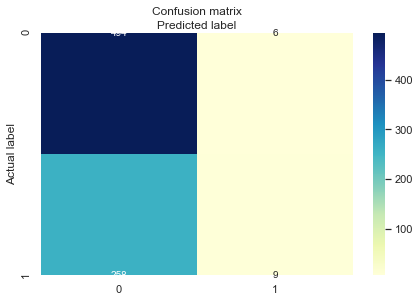

In [49]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6558018252933507
Precision: 0.6
Recall: 0.033707865168539325


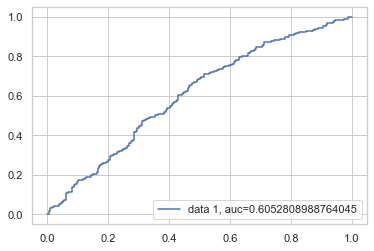

In [51]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# results show that auc = .605 which means that this is almost worthless i.e 0.5 but its NOT 'worthless'